In [13]:
import requests 
import pandas as pd
import json
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

baseUrl = "https://opendata.lillemetropole.fr/api/records/1.0/search/?dataset="
paramUrl = "&rows=120"
# on définit une liste vide qui sera incrémentée à chaque nouvelle dataframe
dataFrames = []
# dictionnaire numéroté pour concaténer l'url avec les nom de services à analyser
services = { 0: "bureaux-de-poste",
             1: "localisation-hopitaux",
             2: "postes-securite",
             3: "cinemas-theatres-mel",
             4: "adresse-et-geolocalisation-des-etablissements-denseignement-du-premier-et-second",
}
# pour chaque service, la boucle créé l'url d'appel correspondant puis normalise le résultat du json et le classe dans une dataframe
for i in range(5):
 urlApi = baseUrl + services[i] + paramUrl
 dataFrames.append(pd.DataFrame.from_dict(pd.io.json.json_normalize(json.loads(requests.get(urlApi).text)['records']), orient='columns'))



{'LILLE': 18, "VILLENEUVE D'ASCQ": 8, 'ROUBAIX': 8, 'TOURCOING': 7, 'MARCQ-EN-BAROEUL': 4, 'LAMBERSART': 3, 'WATTRELOS': 3, 'CROIX': 2, '(LOMME) LILLE': 2, 'RONCQ': 2, 'HAUBOURDIN': 2, 'LOOS': 2, 'LA MADELEINE': 2, 'RONCHIN': 2, 'WASQUEHAL': 2}


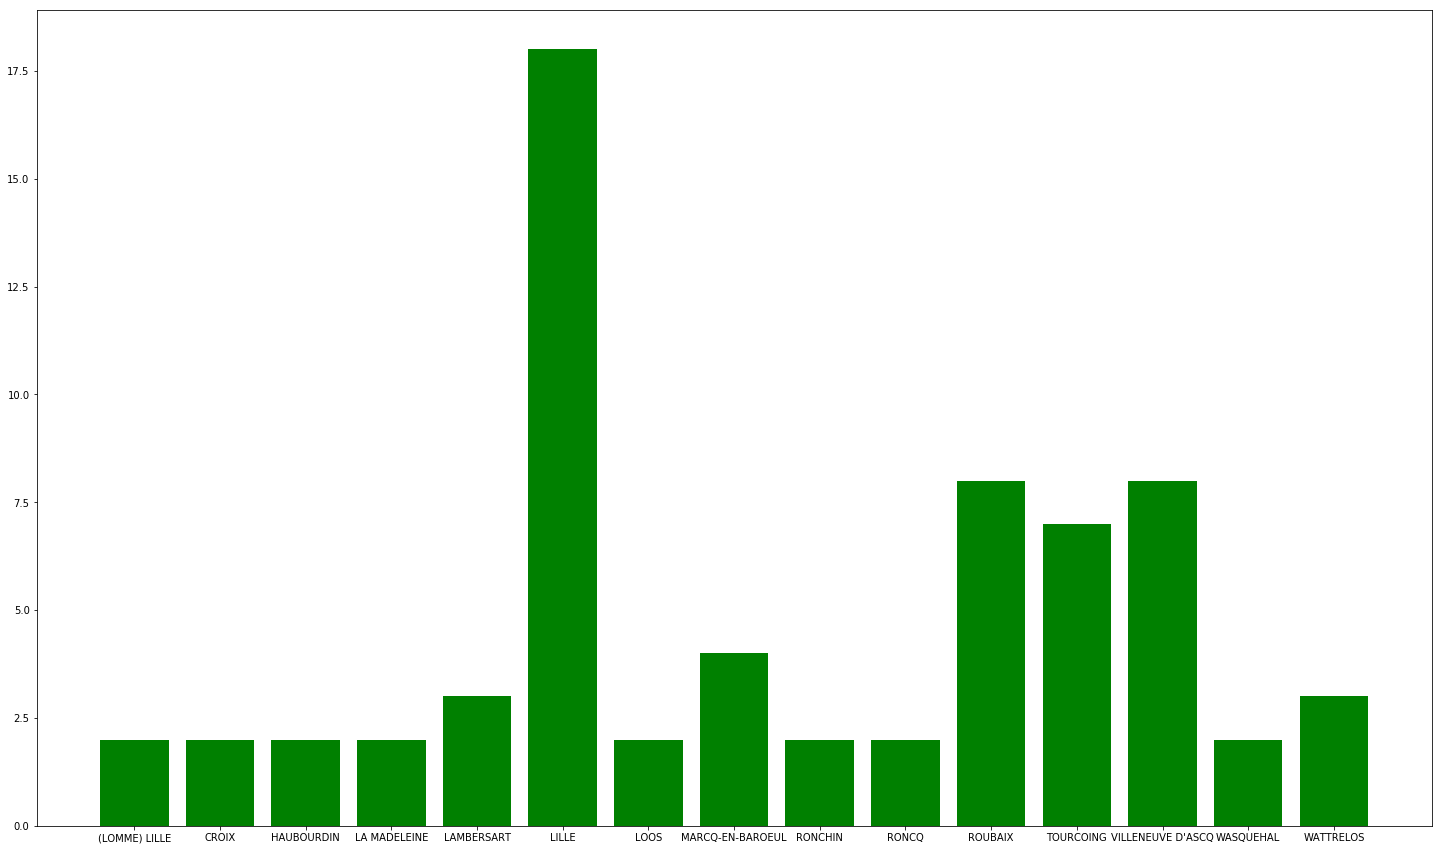

In [7]:
#Pour chaque service, on tâchera de répertorier dans un dictionnaire uniquement les villes contenant plus de 1 référence
#Bureaux de postes :
townCountValues = dataFrames[0]['fields.commune'].value_counts()
townCountDict = {}
for key, townCountValue in townCountValues.items():
 if townCountValue > 1:
    townCountDict.update({key:townCountValue})
print(townCountDict)
#on visualise le nombre d'occurence d'un service donné avec un diagramme à barre classique
fig = plt.figure(figsize=(25,15))
plt.bar(list(townCountDict.keys()), townCountDict.values(), color='g')
plt.show()

{'LILLE': 6, 'TOURCOING': 3, 'ROUBAIX': 3, '(LOMME) LILLE': 2}


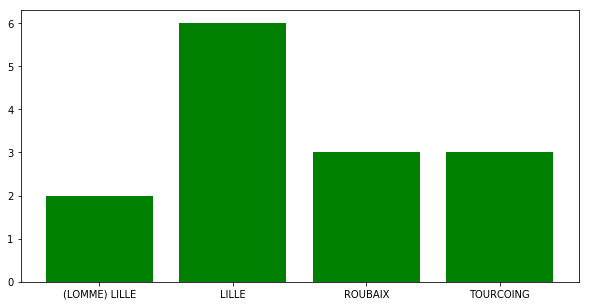

In [10]:
#Localisation hopitaux :
townCountValues = dataFrames[1]['fields.commune'].value_counts()
townCountDict = {}
for key, townCountValue in townCountValues.items():
 if townCountValue > 1:
    townCountDict.update({key:townCountValue})
print(townCountDict)
#on visualise le nombre d'occurence d'un service donné avec un diagramme à barre classique
fig = plt.figure(figsize=(10,5))
plt.bar(list(townCountDict.keys()), townCountDict.values(), color='g')
plt.show()

{'LILLE': 11, 'ROUBAIX': 8, "VILLENEUVE D'ASCQ": 8, 'TOURCOING': 6, 'LA BASSEE': 3, 'ARMENTIERES': 3, 'MARCQ-EN-BAROEUL': 3, 'LOOS': 3, '(LOMME) LILLE': 3, 'SECLIN': 3, 'HAUBOURDIN': 3, 'LA MADELEINE': 3, 'SAINT-ANDRE': 2, 'LAMBERSART': 2, 'QUESNOY SUR DEULE': 2, 'WASQUEHAL': 2, 'MONS-EN-BAROEUL': 2, 'FACHES-THUMESNIL': 2, 'FRETIN': 2}


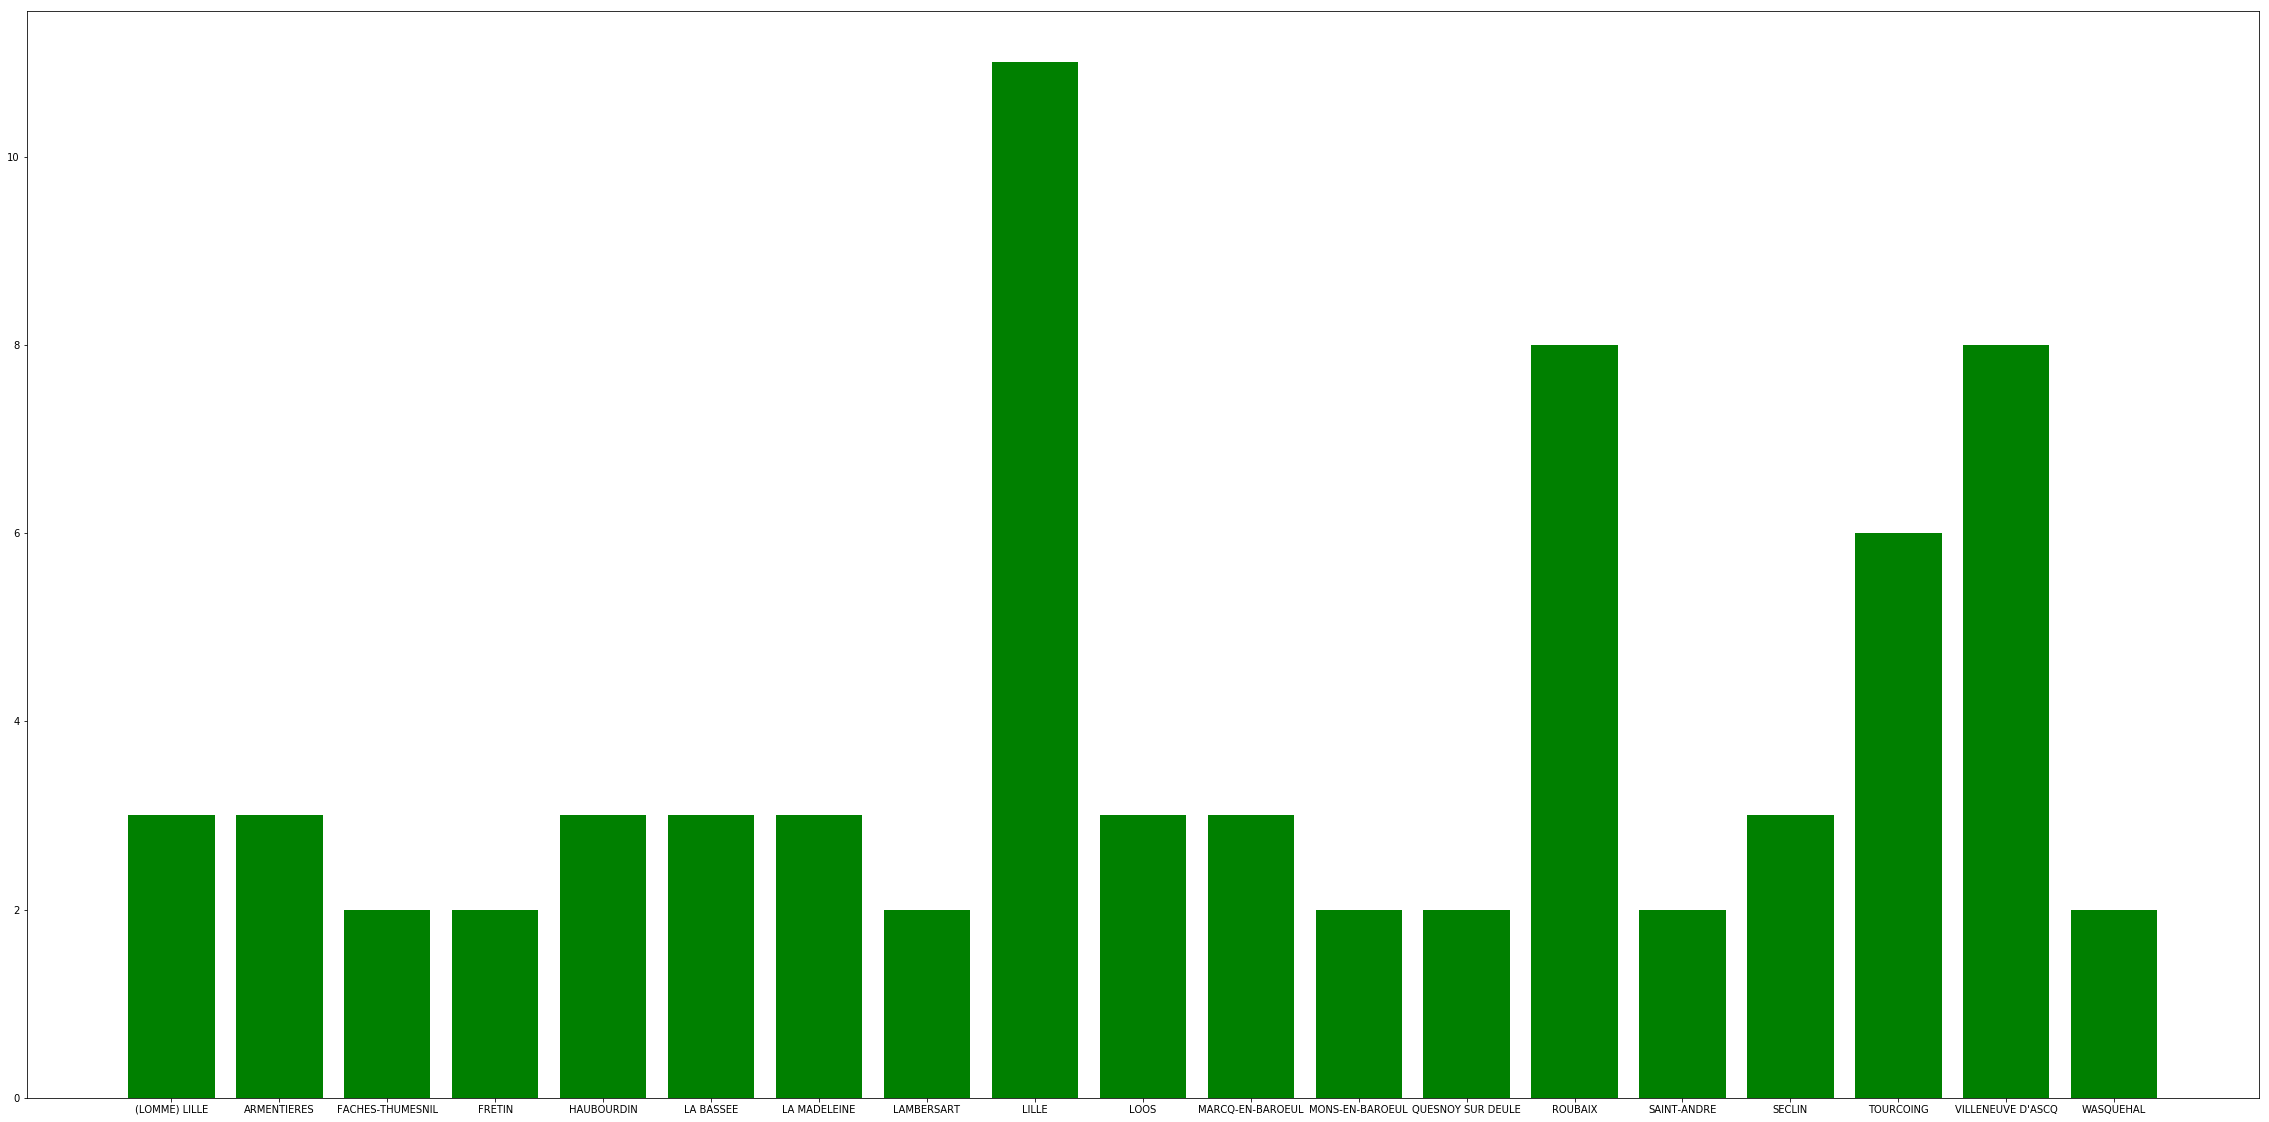

In [16]:
#Postes de sécurité :
townCountValues = dataFrames[2]['fields.commune'].value_counts()
townCountDict = {}
for key, townCountValue in townCountValues.items():
 if townCountValue > 1:
    townCountDict.update({key:townCountValue})
print(townCountDict)
#on visualise le nombre d'occurence d'un service donné avec un diagramme à barre classique
fig = plt.figure(figsize=(40,20))
plt.bar(list(townCountDict.keys()), townCountDict.values(), color='g')
plt.show()

{'LILLE': 11, 'ROUBAIX': 4, 'TOURCOING': 3, "VILLENEUVE D'ASCQ": 3, 'MARCQ-EN-BAROEUL': 2}


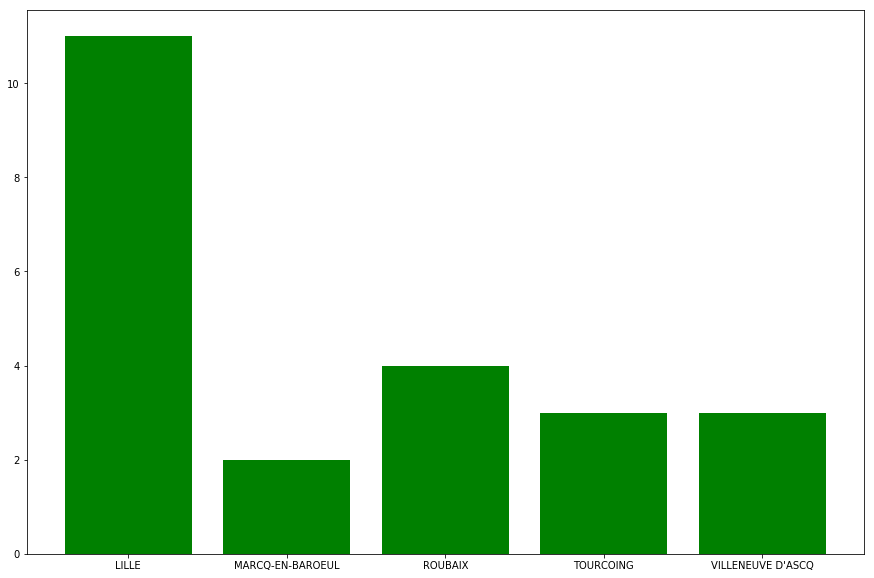

In [18]:
#Cinémas et théâtre :
townCountValues = dataFrames[3]['fields.commune'].value_counts()
townCountDict = {}
for key, townCountValue in townCountValues.items():
 if townCountValue > 1:
    townCountDict.update({key:townCountValue})
print(townCountDict)
#on visualise le nombre d'occurence d'un service donné avec un diagramme à barre classique
fig = plt.figure(figsize=(15,10))
plt.bar(list(townCountDict.keys()), townCountDict.values(), color='g')
plt.show()

{'LILLE': 13, 'TOURCOING': 9, 'ROUBAIX': 8, 'VILLENEUVE D ASCQ': 4, 'LA MADELEINE': 4, 'LAMBERSART': 4, 'RONCHIN': 3, 'WASQUEHAL': 3, 'MARCQ EN BAROEUL': 3, 'WATTRELOS': 3, 'LA MADELEINE CEDEX': 3, 'MONS EN BAROEUL': 3, 'COMINES': 3, 'ARMENTIERES': 2, 'HALLUIN': 2, 'PONT A VENDIN': 2, 'GRUSON': 2, 'DOUVRIN': 2, 'CROIX': 2, 'WAMBRECHIES': 2, 'HEM': 2, 'WINGLES': 2}


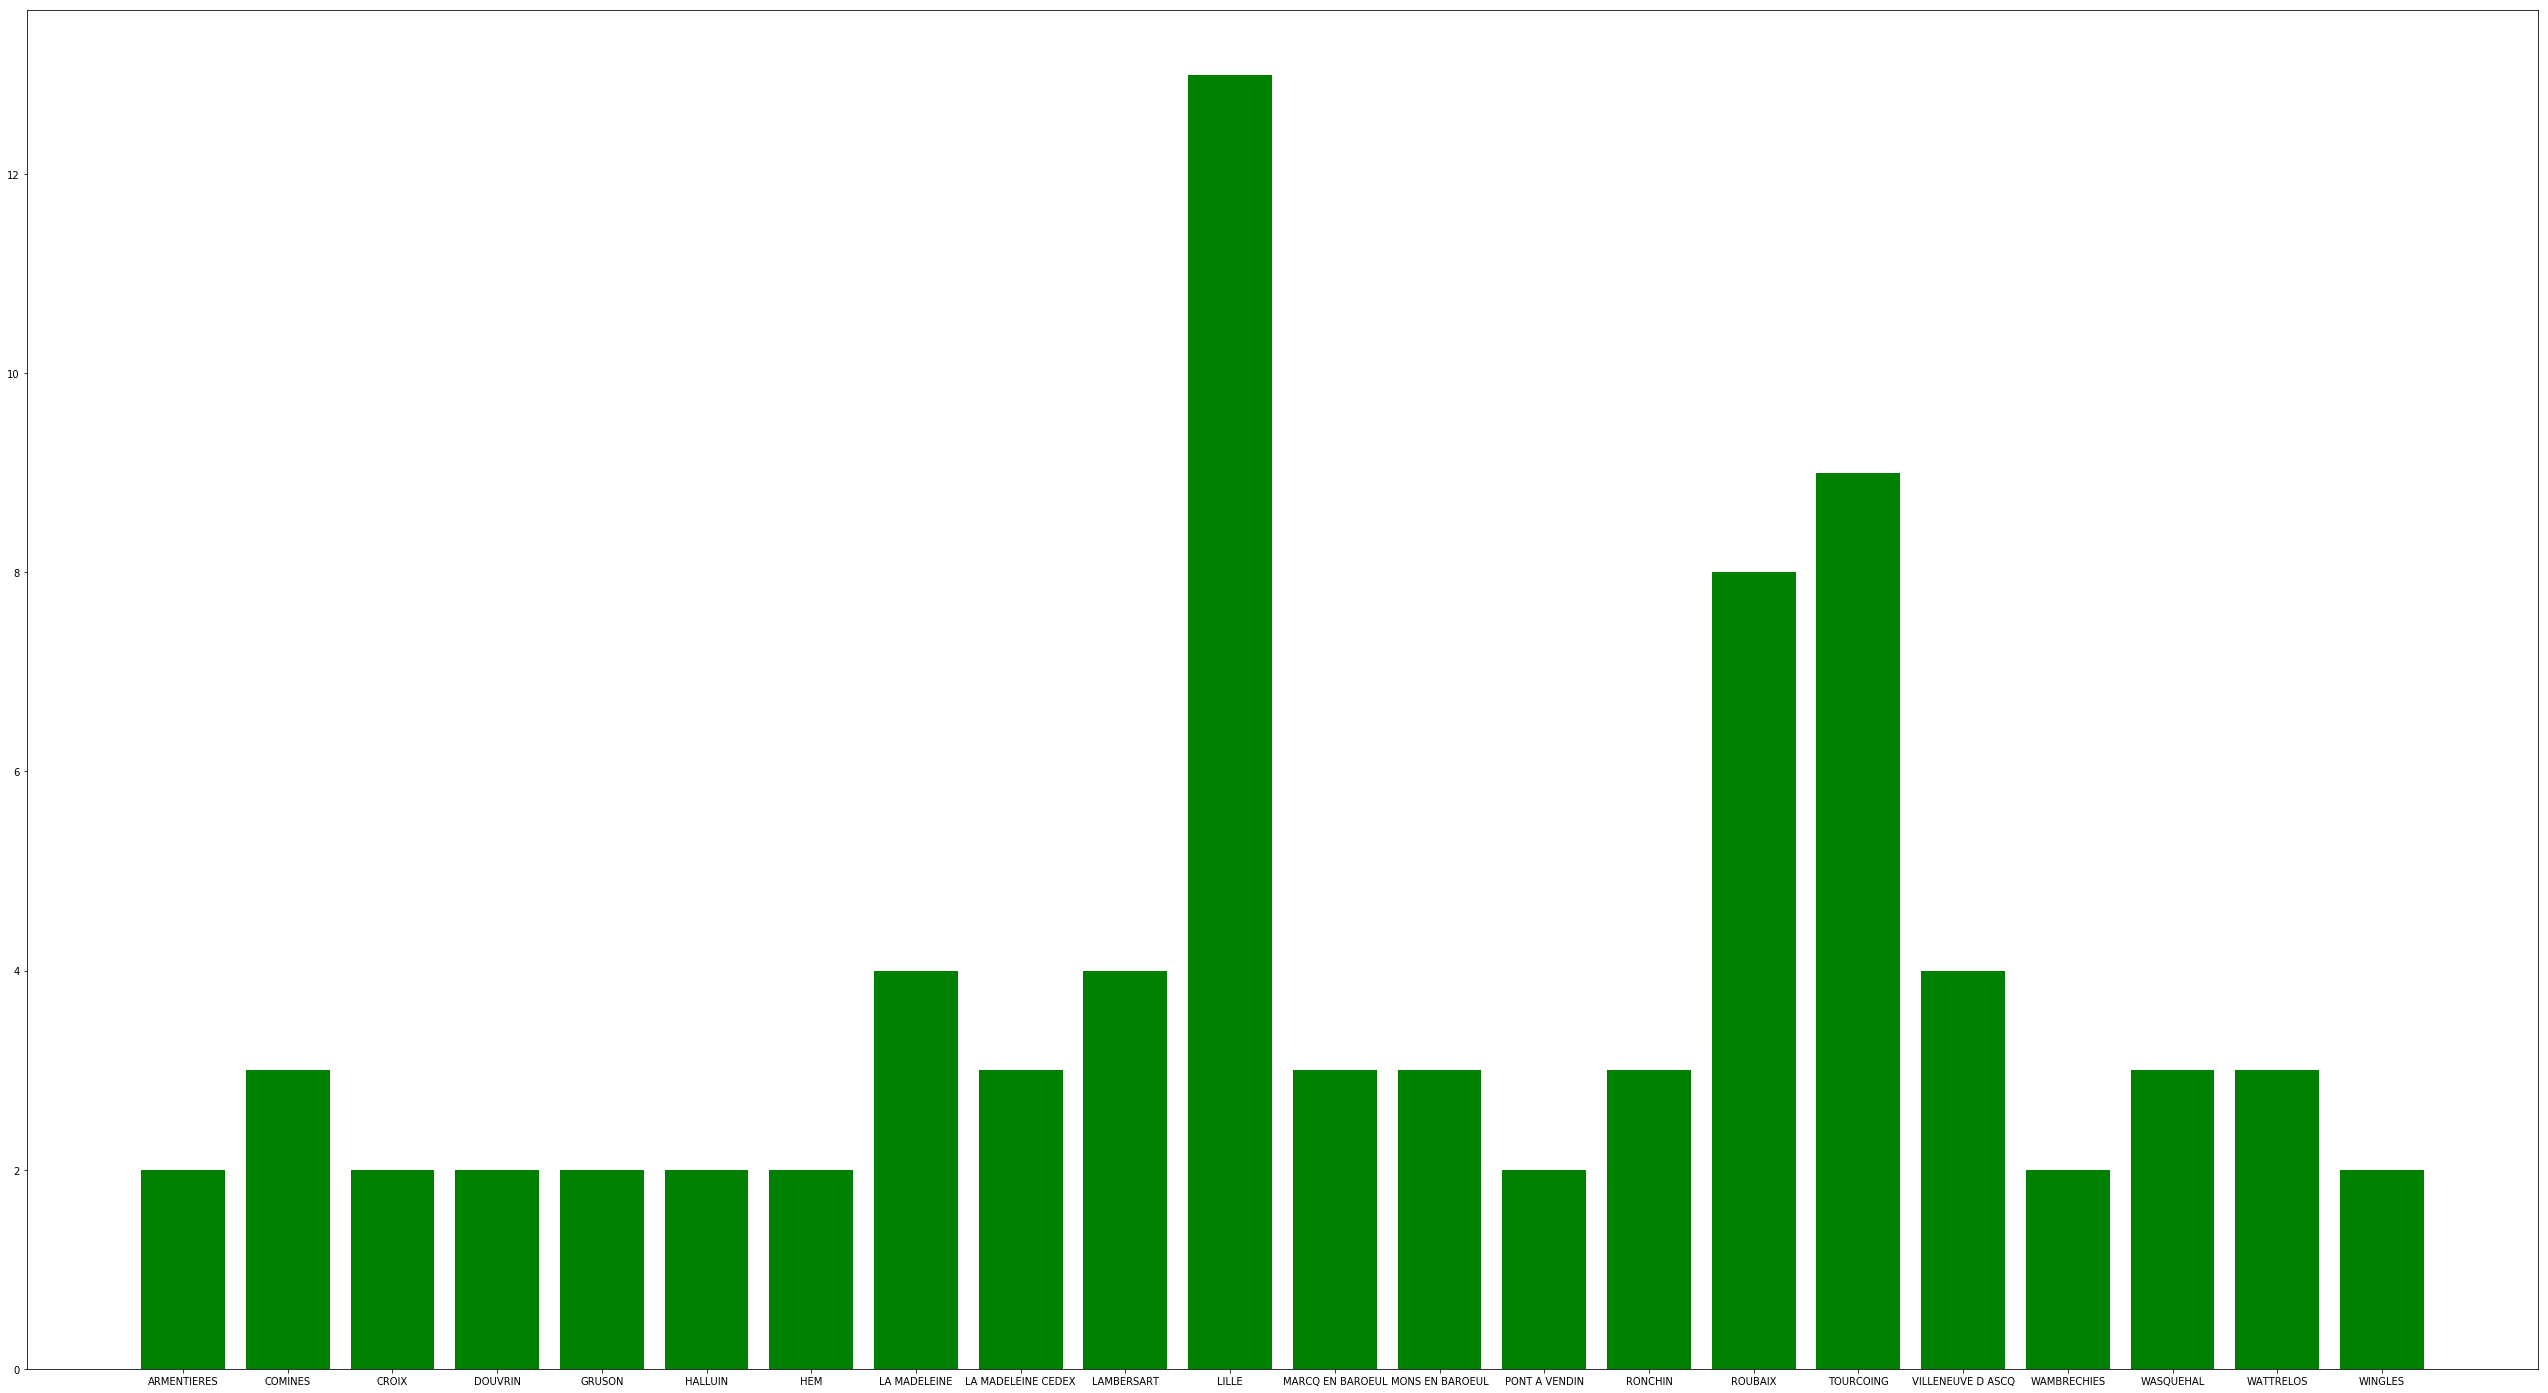

In [25]:
#Education :
townCountValues = dataFrames[4]['fields.localite_acheminement_uai'].value_counts()
townCountDict = {}
for key, townCountValue in townCountValues.items():
 if townCountValue > 1:
    townCountDict.update({key:townCountValue})
print(townCountDict)
#on visualise le nombre d'occurence d'un service donné avec un diagramme à barre classique
fig = plt.figure(figsize=(45,25))
plt.bar(list(townCountDict.keys()), townCountDict.values(), color='g')
plt.show()